In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [48]:
# Using pandas package to read CSV and store the values into a data frame
farmersmkt_data = pd.read_csv('farmersmarkets_imputed.csv')

/Users/vsitham/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning:

Columns (38,43,44,45,46,47,53) have mixed types.Specify dtype option on import or set low_memory=False.



In [49]:
farmersmkt_data.head(3)

,FMID,MarketName,Website,Website_1,Facebook,Facebook_1,Twitter,Twitter_1,Youtube,Youtube_1,...,Season4Date_ismissing,Season4Date 1_ismissing,Season4Date 2_ismissing,Season4Time_ismissing,Season4Time 1_ismissing,Season4Time 2_ismissing,Longitude_ismissing,Latitude_ismissing,Location_ismissing,num_missing
0,1012063,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,True,40
1,1011871,Stearns Homestead Farmers Market,http://Stearnshomestead.com,http://Stearnshomestead.com,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,True,41
2,1011878,100 Mile Market,http://www.pfcmarkets.com,http://www.pfcmarkets.com,https://www.facebook.com/100MileMarket/?fref=ts,https://www.facebook.com/100MileMarket/?fref=ts,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,True,37


In [50]:
farmersmkt_data.dtypes

FMID                        int64
MarketName                 object
Website                    object
Website_1                  object
Facebook                   object
                            ...  
Season4Time 2_ismissing      bool
Longitude_ismissing          bool
Latitude_ismissing           bool
Location_ismissing           bool
num_missing                 int64
Length: 149, dtype: object

In [51]:
# Print the summary of a DataFrame, including column names, the number of non-null values, and data type.
farmersmkt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Columns: 149 entries, FMID to num_missing
dtypes: bool(54), float64(2), int64(2), object(91)
memory usage: 6.7+ MB


In [52]:
# Generate descriptive statistics. 
# Descriptive statistics include those that summarize the central tendency, 
# dispersion, and shape of a dataset's distribution, 
# and excluding NaN values.
farmersmkt_data.describe()

,FMID,Longitude,Latitude,num_missing
count,8.675000e+03,8646.000000,8646.000000,8675.000000
mean,1.009420e+06,-90.955082,39.167766,41.833545
std,5.548042e+04,17.488990,5.288960,4.804809
min,1.000001e+06,-166.540000,17.709900,17.000000
25%,1.003090e+06,-97.278250,36.296148,39.000000
50%,1.006213e+06,-86.208287,40.051682,41.000000
75%,1.009568e+06,-77.522151,42.447858,47.000000
max,2.000036e+06,-64.704300,64.862750,51.000000


In [53]:
farmersmkt_data.nunique()

FMID                       8675
MarketName                 7866
Website                    4270
Website_1                  4169
Facebook                   3252
                           ... 
Season4Time 2_ismissing       2
Longitude_ismissing           2
Latitude_ismissing            2
Location_ismissing            2
num_missing                  32
Length: 149, dtype: int64

In [54]:
farmersmkt_data.shape

(8675, 149)

/Users/vsitham/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



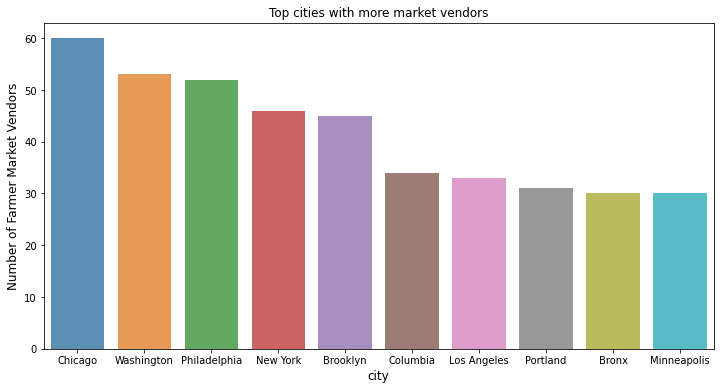

In [55]:
city_count  = farmersmkt_data['city'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(12,6))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Top cities with more market vendors')
plt.ylabel('Number of Farmer Market Vendors', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

In [56]:
df = farmersmkt_data[['Longitude','Latitude','city']]
df.head(5)
city_count.count()

10

In [59]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure(data=go.Scattergeo(
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['city'],
        mode = 'markers',
        marker_color = city_count,
        ))

fig.update_layout(
        title = 'Farmer Markets concentration on US Cities',
        geo_scope='usa',
    )
fig.show()

In [60]:
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['city'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.9,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 5,
            color = city_count,
            cmax = city_count.max(),
            colorbar_title="Farmer Markets concentration on US Cities"
        )))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for City names)',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

In [61]:
df_drop_columns = farmersmkt_data.dropna(axis='columns', how='all') 
# how='all': if all values are NA, drop that columns.
df_drop_columns.head()

,FMID,MarketName,Website,Website_1,Facebook,Facebook_1,Twitter,Twitter_1,Youtube,Youtube_1,...,Season4Date_ismissing,Season4Date 1_ismissing,Season4Date 2_ismissing,Season4Time_ismissing,Season4Time 1_ismissing,Season4Time 2_ismissing,Longitude_ismissing,Latitude_ismissing,Location_ismissing,num_missing
0,1012063,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,True,40
1,1011871,Stearns Homestead Farmers Market,http://Stearnshomestead.com,http://Stearnshomestead.com,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,True,41
2,1011878,100 Mile Market,http://www.pfcmarkets.com,http://www.pfcmarkets.com,https://www.facebook.com/100MileMarket/?fref=ts,https://www.facebook.com/100MileMarket/?fref=ts,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,True,37
3,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,True,47
4,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,False,False,True,40


In [62]:
df_drop_columns['zip']

0        5828
1       44130
2       49007
3       29682
4       64759
        ...  
8670    87004
8671    55398
8672    84767
8673    46077
8674    64153
Name: zip, Length: 8675, dtype: object

In [63]:
df_drop_columns['updateTime']

0       2016-06-28T12:10:09Z
1       2016-04-09T20:05:17Z
2       2016-07-15T19:20:33Z
3       2013-01-01T00:00:00Z
4       2014-10-28T09:49:46Z
                ...         
8670    2014-06-05T14:40:25Z
8671    2016-06-27T15:44:36Z
8672    2016-07-09T17:00:07Z
8673    2009-01-01T00:00:00Z
8674    2015-09-04T09:48:39Z
Name: updateTime, Length: 8675, dtype: object

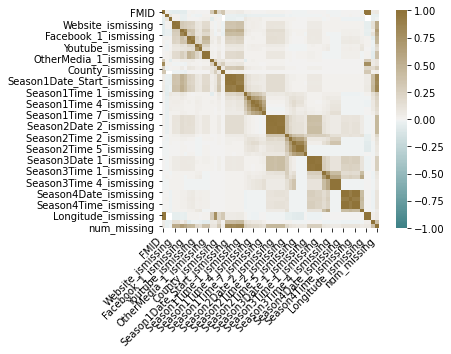

In [66]:
corr = farmersmkt_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(200, 420, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);